In [113]:
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings("ignore")


In [114]:
df=pd.read_csv('Mall_customers.csv')
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [115]:
 df.shape

(200, 5)

In [116]:
df.drop(['CustomerID'], axis=1, inplace=True)

In [117]:
df

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
...,...,...,...,...
195,Female,35,120,79
196,Female,45,126,28
197,Male,32,126,74
198,Male,32,137,18


ValueError: Could not interpret input 'Gender'

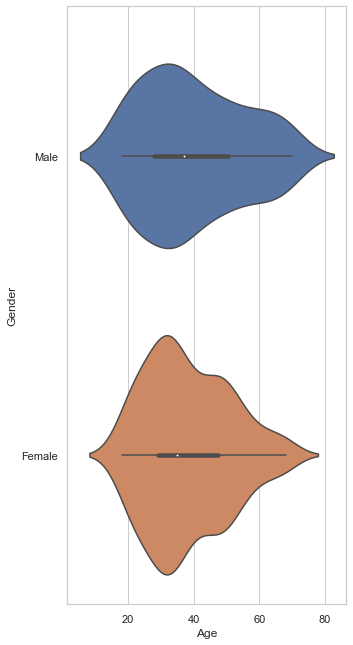

In [118]:
plt.figure(1,figsize =(20,11))
n=0
for cols in ['Age', 'Annual Income(k$)', 'Spending score (1-100)']:
    n+=1
    plt.subplot(1, 3, n)
    sns.set(style="whitegrid")
    plt.subplots_adjust(hspace = 0.5, wspace = 0.5)
    sns.violinplot(x= cols, y='Gender', data =df)
    sns.countplot(y='Gender' if n == 1 else '')
    plt.title('violin Plot')
plt.show()

In [ ]:
age_18_25 = df.Age[(df.Age >=18) & (df.Age <=25)]
age_26_35 = df.Age[(df.Age >=26) & (df.Age <=35)]
age_36_45 = df.Age[(df.Age >=36) & (df.Age <=45)]
age_46_55 = df.Age[(df.Age >=46) & (df.Age <=55)]
age_56 = df.Age[df.Age >=56]

agex = ["18-25", "26-35", "36-45", "46-55", "55+"]
agey = [len(age_18_25.values), len(age_26_35.values), len(age_36_45.values),len(age_46_55.values), len(age_56.values)]


plt.figure(figsize = (13,10))
sns.barplot(x=agex, y=agey, palette ="mako")
plt.title("Number Of Customers and Age")
plt.ylabel("Number of Customer")
plt.xlabel("Age")
plt.grid()
plt.show()

In [ ]:
df.describe()

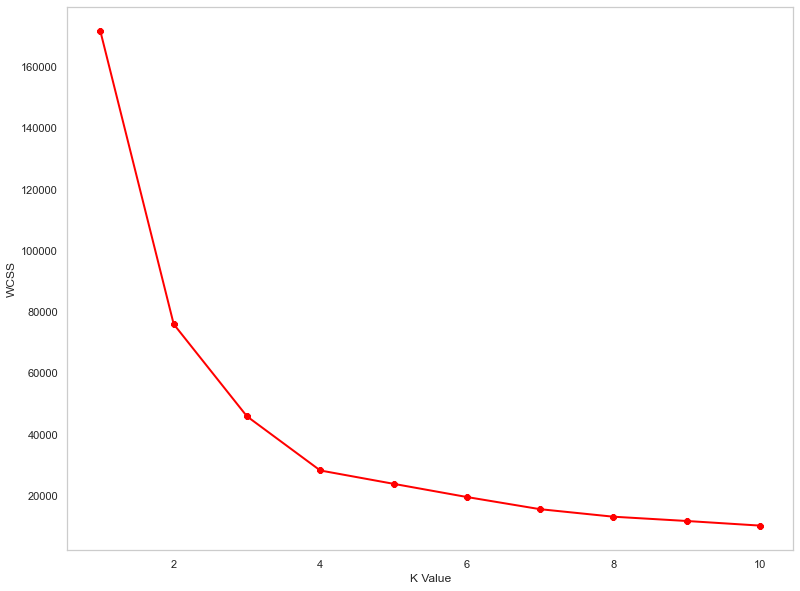

In [120]:
X1=df.loc[:, ["Age", "Spending Score (1-100)"]].values

from sklearn.cluster import KMeans
wcss = []
for k in range(1, 11):
    kmeans =KMeans(n_clusters=k, init = "k-means++")
    kmeans.fit(X1)
    wcss.append(kmeans.inertia_)

plt.figure(figsize = (13,10))
plt.grid()
plt.plot(range(1,11), wcss, linewidth=2, color="red", marker="8")
plt.ylabel("WCSS")
plt.xlabel("K Value")
plt.show()    


In [ ]:
kmeans = KMeans(n_clusters=4)
label = kmeans.fit_predict(X1)
print(label)

In [ ]:
print(kmeans.cluster_centers_)

In [ ]:
plt.scatter(X1[:,0], X1[:,1], c=kmeans.labels_, cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1] ,color='black')
 
plt.title('Clusters of Customers')
plt.xlabel('Age')
plt.ylabel('Spending Score(1-100)')
plt.show()

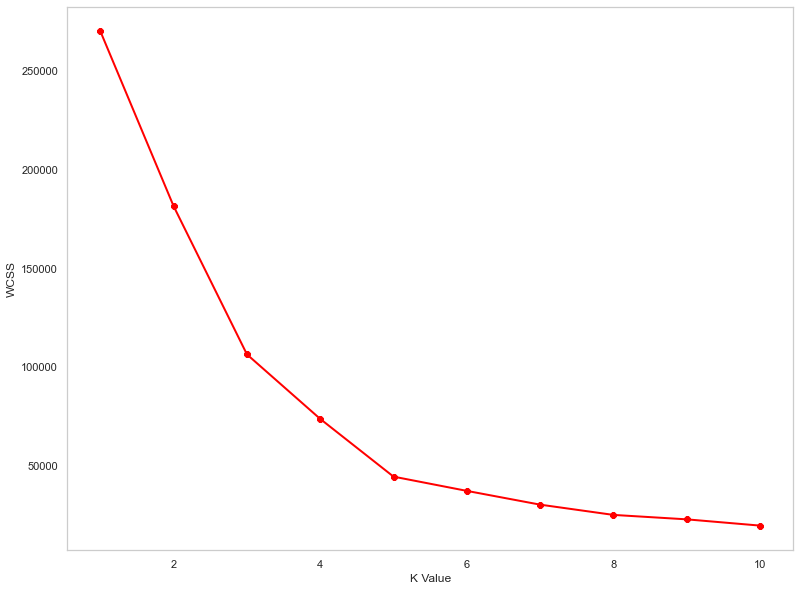

In [119]:
X2=df.loc[:, ["Annual Income (k$)", "Spending Score (1-100)"]].values

from sklearn.cluster import KMeans
wcss = []
for k in range(1, 11):
    kmeans =KMeans(n_clusters=k, init = "k-means++")
    kmeans.fit(X2)
    wcss.append(kmeans.inertia_)

plt.figure(figsize = (13,10))
plt.grid()
plt.plot(range(1,11), wcss, linewidth=2, color="red", marker="8")
plt.ylabel("WCSS")
plt.xlabel("K Value")
plt.show()    


In [ ]:
kmeans = KMeans(n_clusters=5)
label = kmeans.fit_predict(X2)
print(label)

In [ ]:
print(kmeans.cluster_centers_)

In [ ]:
plt.scatter(X1[:,0], X1[:,1], c=kmeans.labels_, cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1] ,color='black')
 
plt.title('Clusters of Customers')
plt.xlabel('Annual income(k$)')
plt.ylabel('Spending Score(1-100)')
plt.show()